In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\ranis\\OneDrive\\Desktop\\Python_Project\\career_change_prediction_dataset.csv')


# Display the first few rows
print(df.head())

# Check the size of the dataset
print("Rows:", df.shape[0], "Columns:", df.shape[1])


  Field of Study Current Occupation  Age  Gender  Years of Experience  \
0       Medicine   Business Analyst   48    Male                    7   
1      Education          Economist   44    Male                   26   
2      Education          Biologist   21  Female                   27   
3      Education   Business Analyst   33    Male                   14   
4           Arts             Doctor   28  Female                    0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High                 7                 10   
1        Master's                  Low                10                  3   
2        Master's                  Low                 8                  3   
3             PhD               Medium                 7                  9   
4             PhD                  Low                 3                  1   

   Job Opportunities  ...  Skills Gap  Family Influence  Mentorship Available  \
0    

In [2]:
# Display basic information

print(df.info())  # Column names, data types, and missing values
print(df.describe())  # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Field of Study               38444 non-null  object
 1   Current Occupation           38444 non-null  object
 2   Age                          38444 non-null  int64 
 3   Gender                       38444 non-null  object
 4   Years of Experience          38444 non-null  int64 
 5   Education Level              38444 non-null  object
 6   Industry Growth Rate         38444 non-null  object
 7   Job Satisfaction             38444 non-null  int64 
 8   Work-Life Balance            38444 non-null  int64 
 9   Job Opportunities            38444 non-null  int64 
 10  Salary                       38444 non-null  int64 
 11  Job Security                 38444 non-null  int64 
 12  Career Change Interest       38444 non-null  int64 
 13  Skills Gap                   38

In [3]:
print(df.isnull().sum())  # Count of missing values for each column


Field of Study                    0
Current Occupation                0
Age                               0
Gender                            0
Years of Experience               0
Education Level                   0
Industry Growth Rate              0
Job Satisfaction                  0
Work-Life Balance                 0
Job Opportunities                 0
Salary                            0
Job Security                      0
Career Change Interest            0
Skills Gap                        0
Family Influence               9632
Mentorship Available              0
Certifications                    0
Freelancing Experience            0
Geographic Mobility               0
Professional Networks             0
Career Change Events              0
Technology Adoption               0
Likely to Change Occupation       0
dtype: int64


In [4]:
df['Family Influence'] = df['Family Influence'].fillna('No Influence')


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [6]:
df['gender'] = df['gender'].str.capitalize()  # Normalize values


In [7]:
print(df.isnull().sum())  # Ensure no missing values remain


field_of_study                 0
current_occupation             0
age                            0
gender                         0
years_of_experience            0
education_level                0
industry_growth_rate           0
job_satisfaction               0
work-life_balance              0
job_opportunities              0
salary                         0
job_security                   0
career_change_interest         0
skills_gap                     0
family_influence               0
mentorship_available           0
certifications                 0
freelancing_experience         0
geographic_mobility            0
professional_networks          0
career_change_events           0
technology_adoption            0
likely_to_change_occupation    0
dtype: int64


In [8]:
print(df.describe())  # Summary statistics
print("Average Salary:", df['salary'].mean())
print("Most Common Job:", df['current_occupation'].mode()[0])


                age  years_of_experience  job_satisfaction  work-life_balance  \
count  38444.000000         38444.000000      38444.000000       38444.000000   
mean      39.540422            19.548200          5.489673           5.517012   
std       11.574509            11.552474          2.870407           2.879007   
min       20.000000             0.000000          1.000000           1.000000   
25%       30.000000            10.000000          3.000000           3.000000   
50%       40.000000            20.000000          6.000000           6.000000   
75%       50.000000            30.000000          8.000000           8.000000   
max       59.000000            39.000000         10.000000          10.000000   

       job_opportunities         salary  job_security  career_change_interest  \
count       38444.000000   38444.000000  38444.000000            38444.000000   
mean           50.308267  114975.623999      5.481896                0.199901   
std            28.877294   

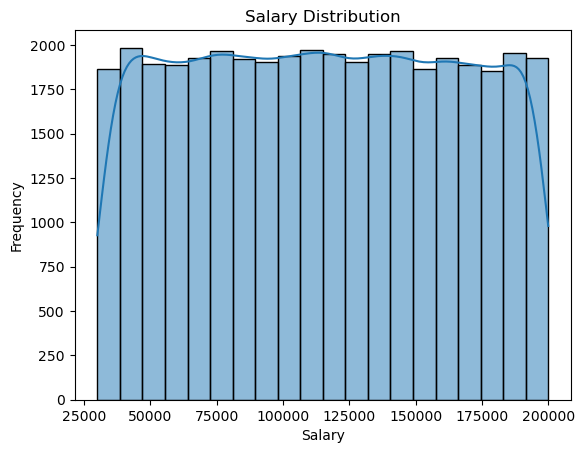

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution
sns.histplot(df['salary'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


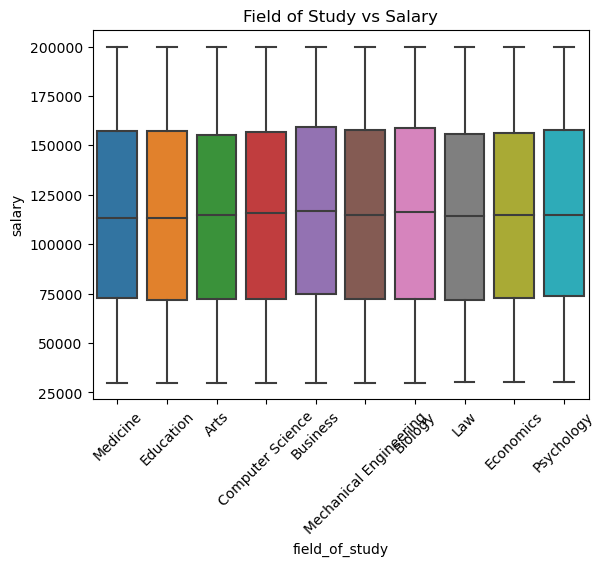

In [10]:
sns.boxplot(x='field_of_study', y='salary', data=df)
plt.title('Field of Study vs Salary')
plt.xticks(rotation=45)
plt.show()


In [11]:
print(df.dtypes)



field_of_study                 object
current_occupation             object
age                             int64
gender                         object
years_of_experience             int64
education_level                object
industry_growth_rate           object
job_satisfaction                int64
work-life_balance               int64
job_opportunities               int64
salary                          int64
job_security                    int64
career_change_interest          int64
skills_gap                      int64
family_influence               object
mentorship_available            int64
certifications                  int64
freelancing_experience          int64
geographic_mobility             int64
professional_networks           int64
career_change_events            int64
technology_adoption             int64
likely_to_change_occupation     int64
dtype: object


In [12]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
print("Numerical columns selected:", numerical_df.columns)


Numerical columns selected: Index(['age', 'years_of_experience', 'job_satisfaction', 'work-life_balance',
       'job_opportunities', 'salary', 'job_security', 'career_change_interest',
       'skills_gap', 'mentorship_available', 'certifications',
       'freelancing_experience', 'geographic_mobility',
       'professional_networks', 'career_change_events', 'technology_adoption',
       'likely_to_change_occupation'],
      dtype='object')


In [13]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['field_of_study_encoded'] = le.fit_transform(df['field_of_study'])
df['gender_encoded'] = le.fit_transform(df['gender'])
df['family_influence_encoded'] = le.fit_transform(df['family_influence'])

# Add the encoded columns to numerical_df
numerical_df['field_of_study_encoded'] = df['field_of_study_encoded']
numerical_df['gender_encoded'] = df['gender_encoded']
numerical_df['family_influence_encoded'] = df['family_influence_encoded']


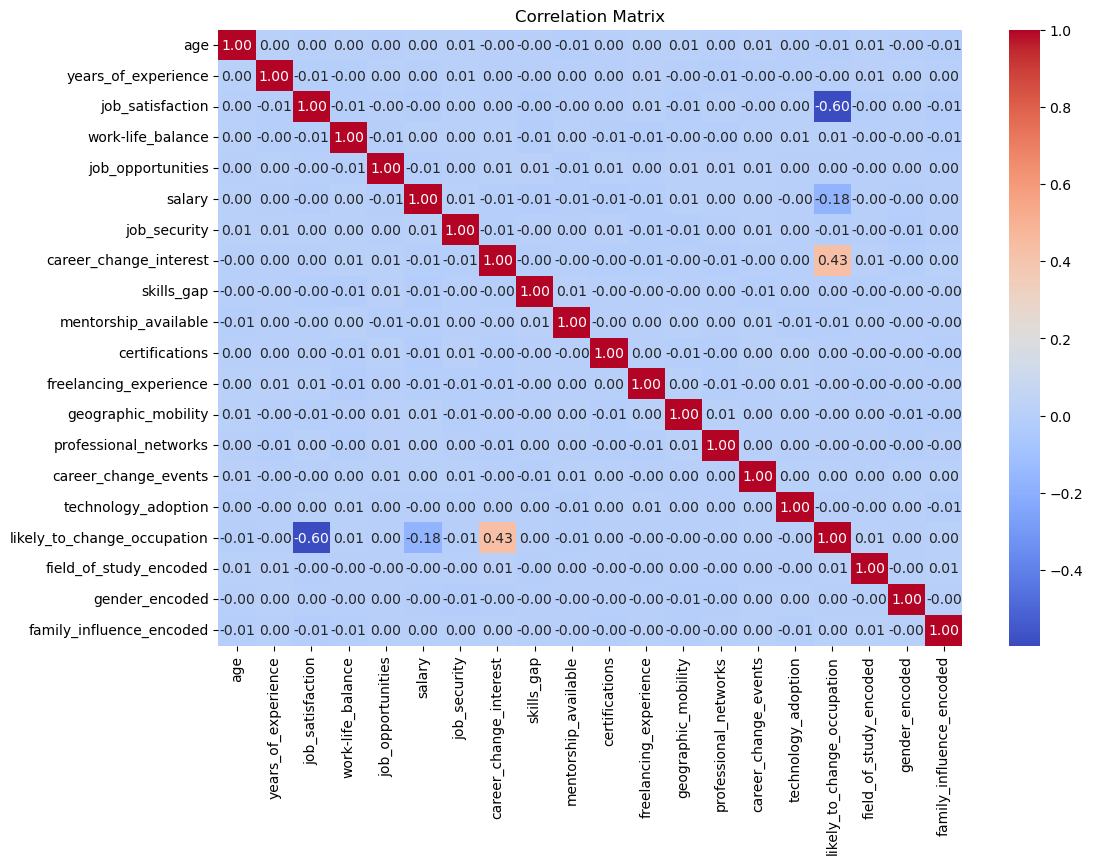

In [14]:
# Generate the heatmap only after numerical_df is defined
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


field_of_study
Business                  116645.556236
Biology                   115786.725835
Psychology                115575.565288
Mechanical Engineering    115024.946323
Computer Science          114912.929169
Medicine                  114563.018992
Law                       114478.885225
Economics                 114377.736842
Education                 114241.574692
Arts                      114109.691204
Name: salary, dtype: float64


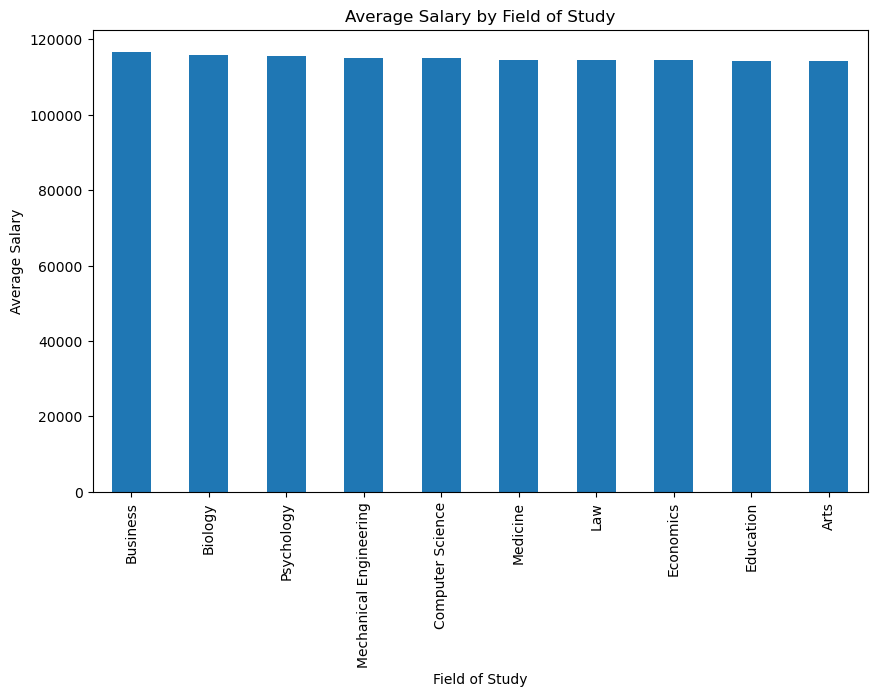

In [15]:
#Question 1: Which Field of Study Has the Highest Average Salary?
avg_salary_by_field = df.groupby('field_of_study')['salary'].mean().sort_values(ascending=False)
print(avg_salary_by_field)

# Plot
avg_salary_by_field.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Average Salary')
plt.show()


gender
Female    5.483237
Male      5.496161
Name: job_satisfaction, dtype: float64


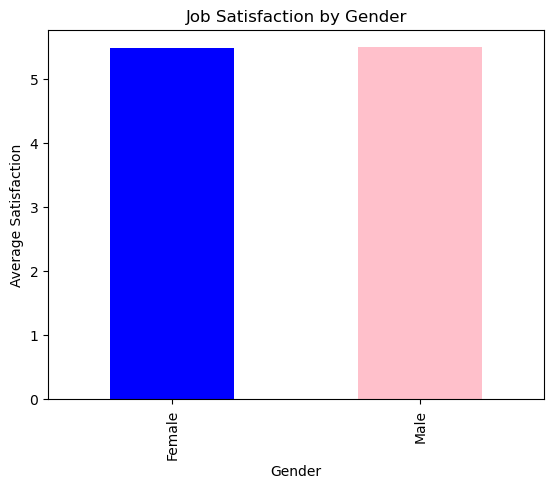

In [16]:
#Question 2: How Does Job Satisfaction Vary by Gender?  
avg_satisfaction_by_gender = df.groupby('gender')['job_satisfaction'].mean()
print(avg_satisfaction_by_gender)

# Plot
avg_satisfaction_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Job Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction')
plt.show()


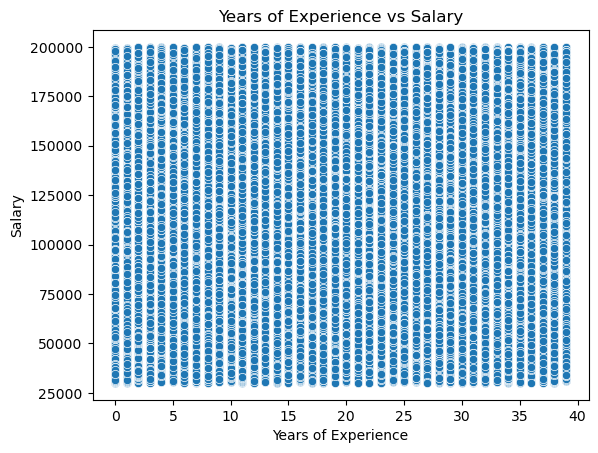

In [17]:
#Question 3: Is There a Correlation Between Years of Experience and Salary? 
sns.scatterplot(x='years_of_experience', y='salary', data=df)
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


current_occupation
Software Developer    3892
Psychologist          3890
Doctor                3888
Teacher               3886
Artist                3881
Name: count, dtype: int64


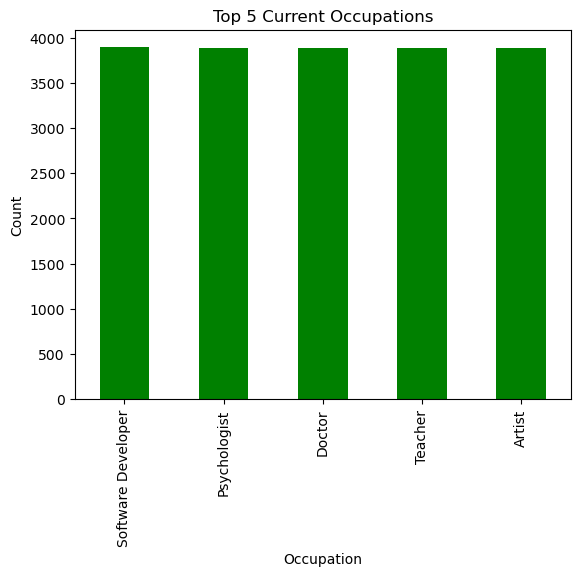

In [18]:
#Question 4: What Are the Top 5 Current Occupations?
top_occupations = df['current_occupation'].value_counts().head(5)
print(top_occupations)

# Plot
top_occupations.plot(kind='bar', color='green')
plt.title('Top 5 Current Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


In [19]:

print(df.columns)


Index(['field_of_study', 'current_occupation', 'age', 'gender',
       'years_of_experience', 'education_level', 'industry_growth_rate',
       'job_satisfaction', 'work-life_balance', 'job_opportunities', 'salary',
       'job_security', 'career_change_interest', 'skills_gap',
       'family_influence', 'mentorship_available', 'certifications',
       'freelancing_experience', 'geographic_mobility',
       'professional_networks', 'career_change_events', 'technology_adoption',
       'likely_to_change_occupation', 'field_of_study_encoded',
       'gender_encoded', 'family_influence_encoded'],
      dtype='object')


In [20]:
df['work-life_balance'] = df['work-life_balance'].astype('category')


In [21]:
df['job_satisfaction'] = pd.to_numeric(df['job_satisfaction'], errors='coerce')


In [22]:
print(df[['work-life_balance', 'job_satisfaction']].isnull().sum())


work-life_balance    0
job_satisfaction     0
dtype: int64


In [23]:
df.dropna(subset=['work-life_balance', 'job_satisfaction'], inplace=True)
# OR
df['job_satisfaction'].fillna(df['job_satisfaction'].mean(), inplace=True)


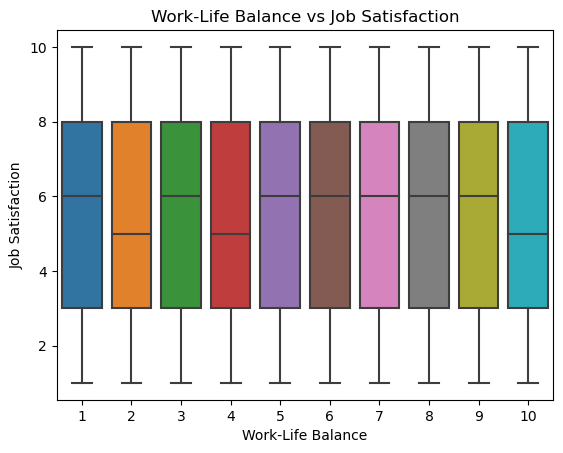

In [24]:
#Question 5: How Does Work-Life Balance Affect Job Satisfaction?
sns.boxplot(x='work-life_balance', y='job_satisfaction', data=df)
plt.title('Work-Life Balance vs Job Satisfaction')
plt.xlabel('Work-Life Balance')
plt.ylabel('Job Satisfaction')
plt.show()